# Integração Numérica

Nessa aula discutiremos técnicas numéricas para aproximar integrais

## Fórmulas de Newton Cotes

São as aplicações mais simples de integração, onde se aproxima a integral da função f por uma combinação linear de n valores, ou seja:
    \begin{equation}
    I = \int_{a}^{b} f(x)dx \approx \sum_{i=0}^{n}A_if(x_i)
    \end{equation}

Onde $x_i=hi + x_0$, onde $h = \frac{b-a}{n}$ é o tamanho do passo e $Ai$ são chamados de pesos. 
Podemos obter os coeficientes de $A_i$ aproximando a função $f_i$ pelo polinômio de Lagrange $P_n$ que interpola ${(x_i,f_i)}_{i=1}^n$. Isso significa que os pesos dependem apenas de $x_i$
 \begin{equation}
    \int_{a}^{b}f(x)dx \approx\int_{a}^{b}L(x)dx = \int_{a}^{b}(\sum_{i=0}^{n}f(x_i)l_i(x))dx =\sum_{i=0}^{n}f(x_i)\int_{a}^{b}l_i(x)dx
    \end{equation}


### Soma de Riemman
<img src="somaRiemann.jpg">

Esse é o método mais simples de aproximar. Com apenas um intervalo [a,b], aproxima-se f(x) por um polinômio constante.
Se aproxima-mos f(x) pela esquerda, temos que f(x) = f(a). Ou seja, particionamos a integral em retângulos.
Outras formas similares são a aproximação a direita e usando o ponto médio.

In [486]:
import numpy as np
import math
import matplotlib.pyplot as plt  

# Soma de Riemann a esquerda:
def riemannEsquerda(f,a,b,n):
    integral = 0.0
    h = (b-a)/n
    
    for i in range (0,n):
        x = a + h*(i)
        integral += f(x)
        
    integral = integral * h
        
    return integral

# Soma de Riemann a direita:
def riemannDireita(f,a,b,n):
    integral = 0.0
    h = (b-a)/n
    
    for i in range (1, n+1):
        x = a + h*(i)
        integral += f(x)
        
    integral = integral * h
        
    return integral

# Soma de Riemann usando ponto medio:
def riemannPontoMedio(f,a,b,n):
    integral = 0.0
    h = (b-a)/n
    
    for i in range (0, n):
        x0 = a + h*(i)
        x1 = a + h*(i+1)
        x = (x0+x1)/2
        integral += f(x)
        
    integral = integral * h
        
    return integral


def F(x):
    return x**3

nomeF = '$x^3$'

print("Integral de x^3 de 0 a 10, com 4 intervalos. O valor esperado é 2500")
print("esquerda:")
integralEsq = riemannEsquerda(F,0,10,4)
print(integralEsq)
print("direita:")
integralDir = riemannDireita(F,0,10,4)
print(integralDir)
print("meio:")
integralPM = riemannPontoMedio(F,0,10,4)
print(integralPM)


Integral de x^3 de 0 a 10, com 4 intervalos. O valor esperado é 2500
esquerda:
1406.25
direita:
3906.25
meio:
2421.875


### Regra do Trapézio
<img src="regraTrap.png">
Seja $f(x)$ uma função com uma segunda derivada continua, definida no intervalo $[a,b]$. Sendo $y0 = f(a)$ e $y1=f(b)$, iremos considerar a interpolação por um polinômio $P_1$ de grau 1 pelos pontos ${a,y0}$ e ${b,y1}$

In [487]:
def regraTrapezio(f, a, b):
    h = (b-a) / 2
    f0 = f(a)
    f1 = f(b)
    return h*(f0+f1)

print("Integral de x^3 de 0 a 10")
integral = regraTrapezio(F,0,10)
print(integral)

Integral de x^3 de 0 a 10
5000.0


### Regra de Simpson
<img src="regraSimp.png">
Semelhante a regra do Trapézio, porém usando um polinômio de grau 2, ie, uma parábola.
Escolhemos três pontos que fazem parte de f(x)

In [488]:
def regraSimpson(f, a, b):
    h = (b-a)/2
    c = (a+b)/2
    integral = f(a) + 4*f(c) + f(b)
    return integral*h/3

print("Integral de x^3 de 0 a 10")
integral = regraSimpson(F,0,10)
print(integral)

Integral de x^3 de 0 a 10
2500.0


## Fórmulas de Newton Cotes Compostas

Uma estratégia para reduzir o erro consiste em dividir o intervalo de integração em diversos subintervalos menores, ou seja:
    \begin{equation}
    \int_{a}^{b} f(x)dx =\sum_{i=1}^{n}\int_{x_i}^{x_{i+1}} f(x)dx
    \end{equation}

Onde $a = x_1 < ... < x_{n+1} = b$, onde $n$ é a quantidade de subintervalos particionados.
A soma de Riemmans demonstrada antes já está na forma composta.


### Regra Composta dos Trapézios

<img src="trapComp.png">


 \begin{equation}
    \int_{a}^{b} f(x)dx = \frac{h}{2}(y_0+y_m+2\sum_{i=1}^{n-1}y_i)
 \end{equation}
 
 Sendo $n$ o número de intervalos, e $h=\frac{b-a}{n}$

In [489]:
# Calcula-se a integral da função f no intervalo de a, b
# Devemos decompor esse intervalo em n partes, e para cada uma delas iremos aplicar a regra dos trapézios

def metodoTrapezio(f, a, b, n):
    
    integral = 0.0
    
    #definindo o tamanho h dos sub-intervalos
    h=(b-a)/n
    
    #a integral será a soma das integrais nos sub-intervalos
    for i in range (0, n):
        x0 = f(a+h*i)
        x1 = f(a+h*(i+1))
        integral += x0 + x1
        
    integral = integral * h/2
    
    return integral
    
integral = metodoTrapezio(F,0,10,4)
print("Integral de x^3 de 0 a 10, com 4 intervalos")
print(integral)

        

Integral de x^3 de 0 a 10, com 4 intervalos
2656.25


### Regra composta de Simpson

<img src="simpComp.png">

 \begin{equation}
    \int_{a}^{b} f(x)dx = \frac{h}{3}(y_0+y_{2n}+4\sum_{i=1}^{n}y_{2i-1}+2\sum_{i=1}^{n-1}y_{2i})
 \end{equation}
 
 Sendo $2n$ o número de intervalos, e $h=\frac{b-a}{2n}$

In [490]:
def metodoSimpson(f,a,b,n):
    
    if (n%2 != 0):
        print("n deve ser par")
        return
   
    h = (b-a)/n
    integral = 0.0
    par = 0.0
    impar = 0.0
        
    for i in range (1, n):
        xi = a+h*i
        
        #somatorio dos subintervalos de indice par
        if (i%2 > 0):
            impar += f(xi)
            
        else:
            par += f(xi)
            
    integral = f(a) + f(b) + 4*impar + 2*par 
    return integral*h/3
      
integral = metodoSimpson(F,0,10,4)
print("Integral de x^3 de 0 a 10, com 4 intervalos")
print(integral)


Integral de x^3 de 0 a 10, com 4 intervalos
2500.0


# Exemplos

Vamos agora comparar a precisão dos valores de integração para cada um dos métodos listados, usando diversas integrais conhecidas.

### Integrando $\int_{0}^{10}x^3 dx$, o valor esperado é 2500



In [491]:
from IPython.display import HTML, display
a = 0
b = 10
data =[['Intervalos','Passo', 'Riemann P.Médio', 'Trapézio', 'Simpson'],
       ['2',"%.2f" %Passo(2),"%.6f" %riemannPontoMedio(F,a,b,2),"%.6f" %metodoTrapezio(F,a,b,2),"%.6f" %metodoSimpson(F,a,b,2)],
       ['4',"%.2f" %Passo(4),"%.6f" %riemannPontoMedio(F,a,b,4),"%.6f" %metodoTrapezio(F,a,b,4),"%.6f" %metodoSimpson(F,a,b,4)],
       ['6',"%.2f" %Passo(6),"%.6f" %riemannPontoMedio(F,a,b,6),"%.6f" %metodoTrapezio(F,a,b,6),"%.6f" %metodoSimpson(F,a,b,6)],
       ['8',"%.2f" %Passo(8),"%.6f" %riemannPontoMedio(F,a,b,8),"%.6f" %metodoTrapezio(F,a,b,8),"%.6f" %metodoSimpson(F,a,b,8)],
       ['10',"%.2f" %Passo(10),"%.6f" %riemannPontoMedio(F,a,b,10),"%.6f" %metodoTrapezio(F,a,b,10),"%.6f" %metodoSimpson(F,a,b,10)],
       ['12',"%.2f" %Passo(12),"%.6f" %riemannPontoMedio(F,a,b,12),"%.6f" %metodoTrapezio(F,a,b,12),"%.6f" %metodoSimpson(F,a,b,12)],
       ['24',"%.2f" %Passo(24),"%.6f" %riemannPontoMedio(F,a,b,24),"%.6f" %metodoTrapezio(F,a,b,24),"%.6f" %metodoSimpson(F,a,b,24)],
       ['48',"%.2f" %Passo(48),"%.6f" %riemannPontoMedio(F,a,b,48),"%.6f" %metodoTrapezio(F,a,b,48),"%.6f" %metodoSimpson(F,a,b,48)],
       ['96',"%.2f" %Passo(96),"%.6f" %riemannPontoMedio(F,a,b,96),"%.6f" %metodoTrapezio(F,a,b,96),"%.6f" %metodoSimpson(F,a,b,96)]]
       
      


display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))


Intervalos,Passo,Riemann P.Médio,Trapézio,Simpson
2,5.00,2187.500000,3125.000000,2500.000000
4,2.50,2421.875000,2656.250000,2500.000000
6,1.67,2465.277778,2569.444444,2500.000000
8,1.25,2480.468750,2539.062500,2500.000000
10,1.00,2487.500000,2525.000000,2500.000000
12,0.83,2491.319444,2517.361111,2500.000000
24,0.42,2497.829861,2504.340278,2500.000000
48,0.21,2499.457465,2501.085069,2500.000000
96,0.10,2499.864366,2500.271267,2500.000000


### Graficamente

In [492]:
def plotRiemannEsquerda(f,a,b,n,nome):
    
    #calculo area
    area = riemannEsquerda(f,a,b,n)
    
    #plot em vermelho da função que iremos integrar
    xvalues = np.linspace(a, b, 1000)
    yvalues = [f(x) for x in xvalues]
    plt.plot(xvalues, yvalues, 'r-')
    
    #plot dos retângulos a esquerda
    h = (b - a) / n
    xi = [a + i*h for i in range(0, n)]
    yi = [f(x) for x in xi] 
    plt.title("Soma de Riemann pela esquerda, da função {} dividida em {} retângulos, de {} a {}. Área será {}.".format(nome, n, a, b, round(area,3)))

    for x, y in zip(xi, yi):
        plt.plot([x, x, x+h, x+h, x], [0, y, y, 0, 0], 'b-')
    plt.show()
    return

def plotRiemannDireita(f, a, b, n, nome):
    
    #plot em vermelho da função que iremos integrar
    xvalues = np.linspace(a, b, 1000)
    yvalues = [f(x) for x in xvalues]
    plt.plot(xvalues, yvalues, 'r-')
    
    area = riemannDireita(f,a,b,n)
    
    # plot dos retângulos a direita
    h = (b - a) / n
    xi = [a + i*h for i in range(0, n)]
    yi = [f(x+h) for x in xi] 
    plt.title("Soma de Riemann pela direita, da função {} dividida em {} retângulos, de {} a {}. Área será {}.".format(nome, n, a, b, round(area,3)))
  
    for x, y in zip(xi, yi):
        plt.plot([x, x, x+h, x+h, x], [0, y, y, 0, 0], 'b-')
    plt.show()

def plotRiemannPM(f, a, b, n, nome):
    #plot em vermelho da função que iremos integrar
    xvalues = np.linspace(a, b, 1000)
    yvalues = [f(x) for x in xvalues]
    plt.plot(xvalues, yvalues, 'r-')
    
    area = riemannPontoMedio(f,a,b,n)
    h = (b - a) / n
    xi = [a + i*h for i in range(0, n)]
    yi = [f(x + h/2.0) for x in xi] 
    plt.title("Soma de Riemann pelo ponto médio, da função {} dividida em {} retângulos, de {} a {}. Área será {}.".format(nome, n, a, b, round(area,3)))

    for x, y in zip(xi, yi):
        plt.plot([x, x, x+h, x+h, x], [0, y, y, 0, 0], 'b-')
    plt.show()

    
def plotTrapezio(f, a, b, n, nome):
    #plot em vermelho da função que iremos integrar
    xvalues = np.linspace(a, b, 1000)
    yvalues = [f(x) for x in xvalues]
    plt.plot(xvalues, yvalues, 'r-')
    
    area = metodoTrapezio(f,a,b,n)

    h = (b - a) / n
    xi = [a + i*h for i in range(0, n)]
    plt.title("Método do Trapézio composto, da função {} dividida em {} trapézios, de {} a {}. Área será {}.".format(nome, n, a, b, round(area,3)))
    # trapezios !
    for x in xi:
        plt.plot([x, x, x+h, x+h, x], [0, f(x), f(x+h), 0, 0], 'b-') 
    plt.show()
    
def evalp(x,c):
    d = len(c)-1
    p = c[0]
    xp = 1.0
    for i in range(d):
        xp *= x
        p += c[i+1]*xp
    return p

def buildVmatrix(x):
    d = len(x)-1
    A = np.zeros((len(x),d+1))
    for i in range(len(x)):
        for j in range(d+1):
            A[i,j] = x[i]**j
    return A

def PolynomialInterpolation(x,y):
    A = buildVmatrix(x)
    c = np.linalg.solve(A,y)
    return c

def drawPolynomial(x,y,c,N,a,b,n,f,nome):
    #plot em vermelho da função que iremos integrar
    xvalues = np.linspace(a, b, 1000)
    yvalues = [f(x) for x in xvalues]
    plt.plot(xvalues, yvalues, 'r-')
    
    area = metodoSimpson(f,a,b,n)
    
    delta = 2.0*(b-a)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = a + i*delta - N*delta/4.0
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = b - a
    plt.xlim(a-0.1*deltax, b+0.1*deltax)
    ymin = min(y)
    ymax = max(y)
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.1*deltay,ymax+0.1*deltay)
    plt.title("Método de Simpson composto, da função {}, divida em {} partes, de {} a {}. Área será {}.".format(nome, n, a, b, round(area,3)))
    plt.show()
    
def plotSimpson(f,a,b,n,nomeF):
    h = (b - a) / n
    xi = [a + i*h for i in range(0, n+1)]
    yi = [f(x) for x in xi] 
    A = buildVmatrix(xi)
    c = PolynomialInterpolation(xi,yi)
    drawPolynomial(xi,yi,c,100,a,b,n,f,nomeF)



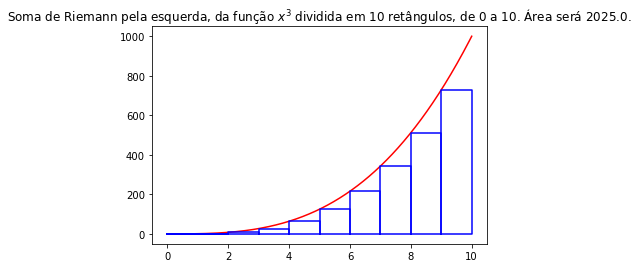

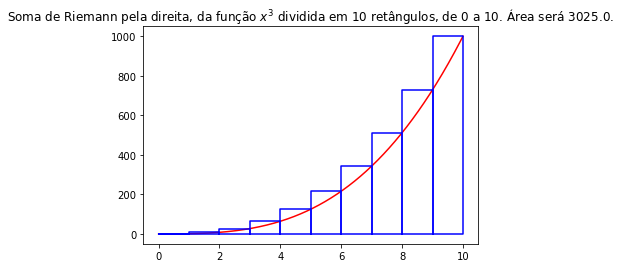

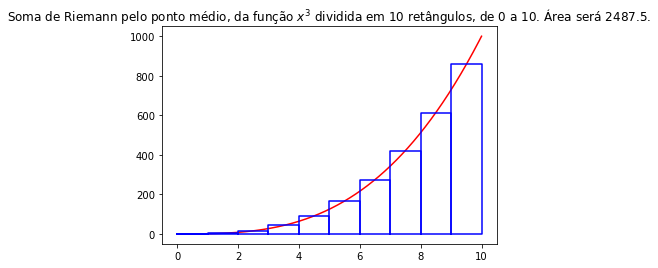

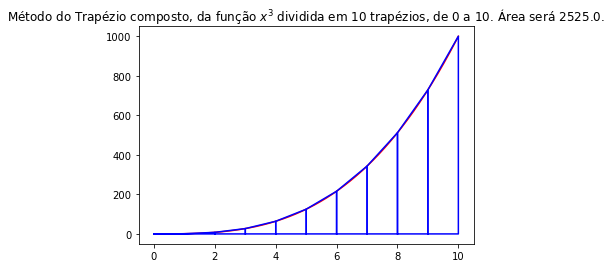

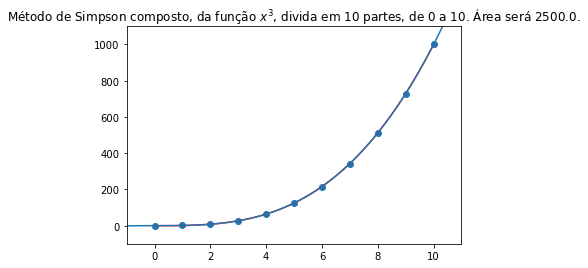

In [461]:
a = 0
b = 10
n = 10

plotRiemannEsquerda(F,a,b,n,nomeF)
plotRiemannDireita(F,a,b,n,nomeF)
plotRiemannPM(F,a,b,n,nomeF)
plotTrapezio(F,a,b,n,nomeF)
plotSimpson(F,a,b,n,nomeF)



### Integrando uma exponencial


### $\int_{0}^{6}x e^{x} dx$
#### Integrado de 0 a 6, o valor esperado é 2018.1

In [493]:
a = 0
b = 6
def Passo(n):
    return (b-a)/n

def G(x):
    return x*math.exp(x)

nomeG = '$x\exp(x)$'

data =[['Intervalos','Passo', 'Riemann P.Médio', 'Trapézio', 'Simpson'],
       ['2',"%.2f" %Passo(2),"%.6f" %riemannPontoMedio(G,a,b,2),"%.6f" %metodoTrapezio(G,a,b,2),"%.6f" %metodoSimpson(G,a,b,2)],
       ['4',"%.2f" %Passo(4),"%.6f" %riemannPontoMedio(G,a,b,4),"%.6f" %metodoTrapezio(G,a,b,4),"%.6f" %metodoSimpson(G,a,b,4)],
       ['6',"%.2f" %Passo(6),"%.6f" %riemannPontoMedio(G,a,b,6),"%.6f" %metodoTrapezio(G,a,b,6),"%.6f" %metodoSimpson(G,a,b,6)],
       ['8',"%.2f" %Passo(8),"%.6f" %riemannPontoMedio(G,a,b,8),"%.6f" %metodoTrapezio(G,a,b,8),"%.6f" %metodoSimpson(G,a,b,8)],
       ['10',"%.2f" %Passo(10),"%.6f" %riemannPontoMedio(G,a,b,10),"%.6f" %metodoTrapezio(G,a,b,10),"%.6f" %metodoSimpson(G,a,b,10)],
       ['12',"%.2f" %Passo(12),"%.6f" %riemannPontoMedio(G,a,b,12),"%.6f" %metodoTrapezio(G,a,b,12),"%.6f" %metodoSimpson(G,a,b,12)],
       ['24',"%.2f" %Passo(24),"%.6f" %riemannPontoMedio(G,a,b,24),"%.6f" %metodoTrapezio(G,a,b,24),"%.6f" %metodoSimpson(G,a,b,24)],
       ['48',"%.2f" %Passo(48),"%.6f" %riemannPontoMedio(G,a,b,48),"%.6f" %metodoTrapezio(G,a,b,48),"%.6f" %metodoSimpson(G,a,b,48)],
       ['96',"%.2f" %Passo(96),"%.6f" %riemannPontoMedio(G,a,b,96),"%.6f" %metodoTrapezio(G,a,b,96),"%.6f" %metodoSimpson(G,a,b,96)]]
       
      

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))


Intervalos,Passo,Riemann P.Médio,Trapézio,Simpson
2,3.00,1235.398873,3811.628974,2661.599204
4,1.50,1774.293184,2523.513924,2094.142240
6,1.00,1904.789929,2248.497781,2035.692313
8,0.75,1953.350008,2148.903554,2024.033430
10,0.60,1976.363778,2102.187767,2020.625105
12,0.50,1989.011053,2076.643855,2019.359213
24,0.25,2010.809588,2032.827454,2018.221987
48,0.12,2016.307152,2021.818521,2018.148877
96,0.06,2017.684562,2019.062836,2018.144275


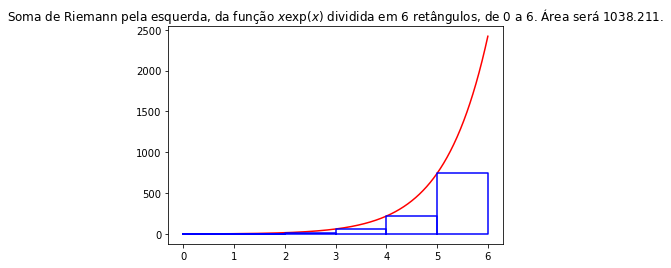

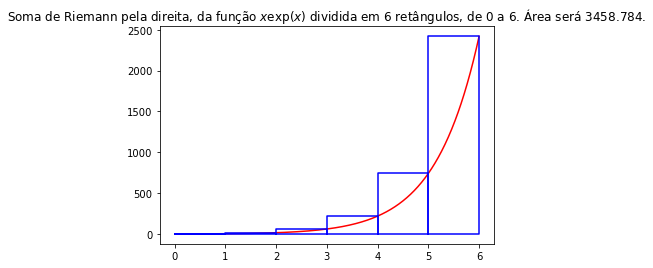

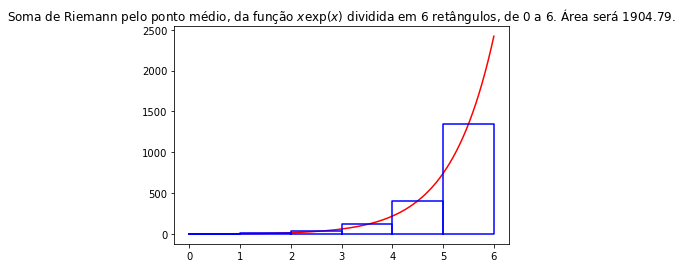

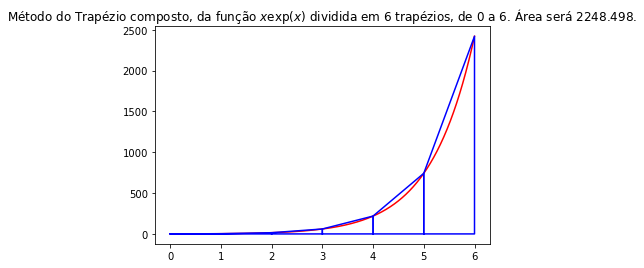

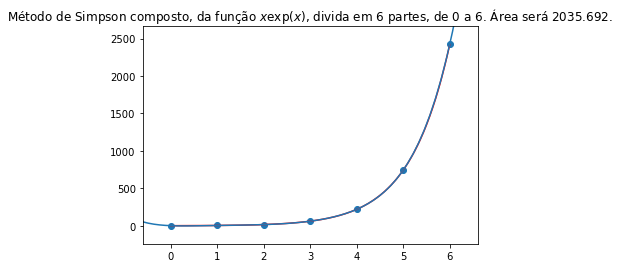

In [463]:
n = 6
         
plotRiemannEsquerda(G,a,b,n,nomeG)
plotRiemannDireita(G,a,b,n,nomeG)
plotRiemannPM(G,a,b,n,nomeG)
plotTrapezio(G,a,b,n,nomeG)
plotSimpson(G,a,b,n,nomeG)



### Integrando o seno


### $\int_{0}^{\pi}\sin x dx$
#### Integrado de 0 a $\pi$, o valor esperado é 2

In [494]:
a = 0
b = math.pi
def Passo(n):
    return (b-a)/n

def H(x):
    return math.sin(x)

nomeH = '$\sin(x)$'

data =[['Intervalos','Passo', 'Riemann PMédio', 'Trapézio', 'Simpson'],
       ['2',"%.2f" %Passo(2),"%.6f" %riemannPontoMedio(H,a,b,2),"%.6f" %metodoTrapezio(H,a,b,2),"%.6f" %metodoSimpson(H,a,b,2)],
       ['4',"%.2f" %Passo(4),"%.6f" %riemannPontoMedio(H,a,b,4),"%.6f" %metodoTrapezio(H,a,b,4),"%.6f" %metodoSimpson(H,a,b,4)],
       ['6',"%.2f" %Passo(6),"%.6f" %riemannPontoMedio(H,a,b,6),"%.6f" %metodoTrapezio(H,a,b,6),"%.6f" %metodoSimpson(H,a,b,6)],
       ['8',"%.2f" %Passo(8),"%.6f" %riemannPontoMedio(H,a,b,8),"%.6f" %metodoTrapezio(H,a,b,8),"%.6f" %metodoSimpson(H,a,b,8)],
       ['10',"%.2f" %Passo(10),"%.6f" %riemannPontoMedio(H,a,b,10),"%.6f" %metodoTrapezio(H,a,b,10),"%.6f" %metodoSimpson(H,a,b,10)],
       ['12',"%.2f" %Passo(12),"%.6f" %riemannPontoMedio(H,a,b,12),"%.6f" %metodoTrapezio(H,a,b,12),"%.6f" %metodoSimpson(H,a,b,12)],
       ['24',"%.2f" %Passo(24),"%.6f" %riemannPontoMedio(H,a,b,24),"%.6f" %metodoTrapezio(H,a,b,24),"%.6f" %metodoSimpson(H,a,b,24)],
       ['48',"%.2f" %Passo(48),"%.6f" %riemannPontoMedio(H,a,b,48),"%.6f" %metodoTrapezio(H,a,b,48),"%.6f" %metodoSimpson(H,a,b,48)],
       ['96',"%.2f" %Passo(96),"%.6f" %riemannPontoMedio(H,a,b,96),"%.6f" %metodoTrapezio(H,a,b,96),"%.6f" %metodoSimpson(H,a,b,96)]]
       
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Intervalos,Passo,Riemann PMédio,Trapézio,Simpson
2,1.57,2.221441,1.570796,2.094395
4,0.79,2.052344,1.896119,2.004560
6,0.52,2.023030,1.954097,2.000863
8,0.39,2.012909,1.974232,2.000269
10,0.31,2.008248,1.983524,2.000110
12,0.26,2.005723,1.988564,2.000053
24,0.13,2.001429,1.997143,2.000003
48,0.07,2.000357,1.999286,2.000000
96,0.03,2.000089,1.999822,2.000000


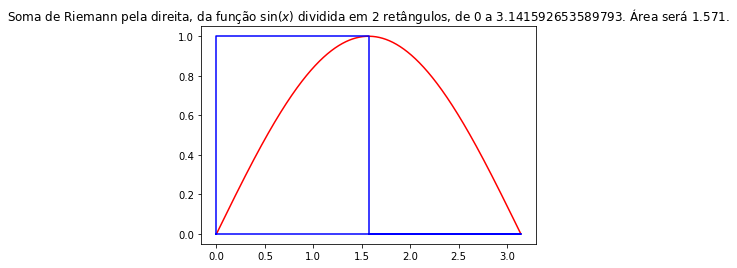

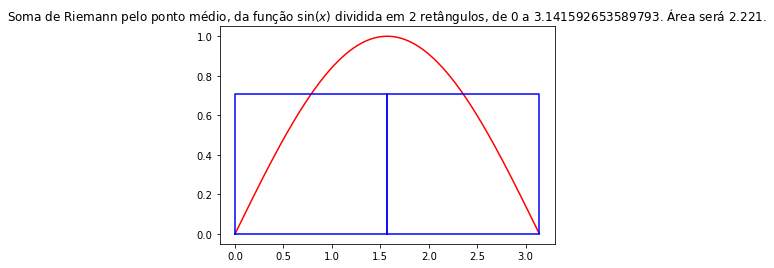

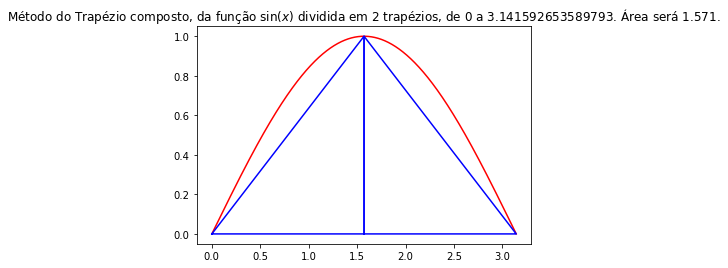

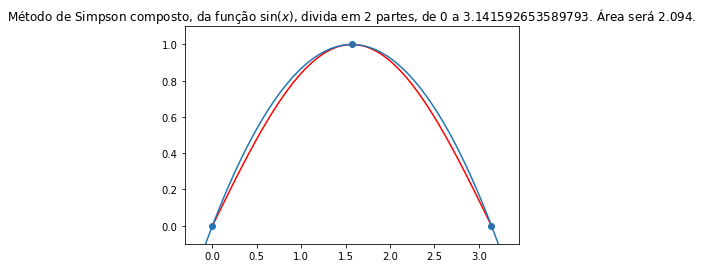

In [465]:
n = 2
         
plotRiemannEsquerda,(H,b,n,nomeH)
plotRiemannDireita(H,a,b,n,nomeH)
plotRiemannPM(H,a,b,n,nomeH)
plotTrapezio(H,a,b,n,nomeH)
plotSimpson(H,a,b,n,nomeH)


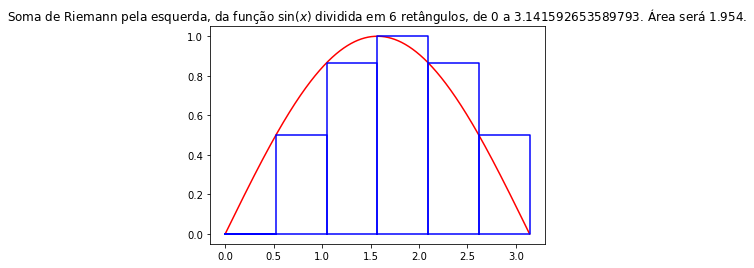

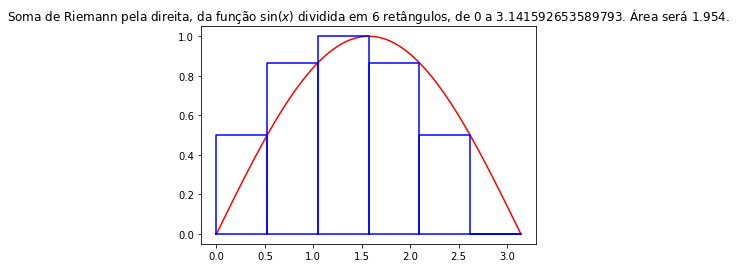

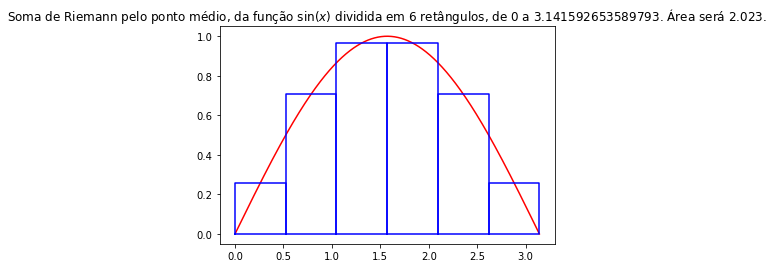

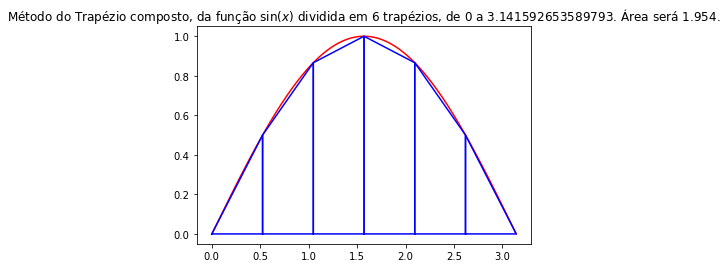

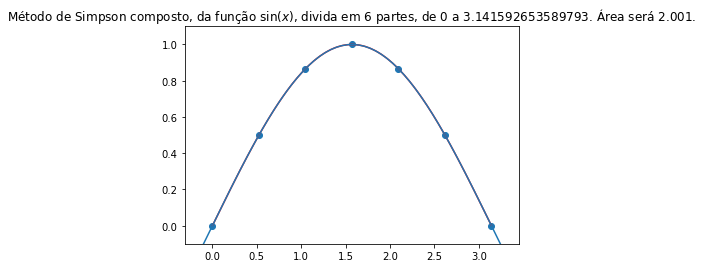

In [495]:
n = 6
         
plotRiemannEsquerda(H,a,b,n,nomeH)
plotRiemannDireita(H,a,b,n,nomeH)
plotRiemannPM(H,a,b,n,nomeH)
plotTrapezio(H,a,b,n,nomeH)
plotSimpson(H,a,b,n,nomeH)

### Integrando o coseno


### $\int_{0}^{\pi}\frac{1-\cos x}{x^2+1} dx$
#### Integrado de 0 a $\pi$, o valor esperado é 0.651759

In [496]:
a = 0
b = math.pi

def I(x):
    return (1-math.cos(x))/(1+x**2)

nomeI = "${1-\cos x}/{x^2+1}$"

data =[['Intervalos','Passo', 'Riemann PMédio', 'Trapézio', 'Simpson'],
       ['2',"%.2f" %Passo(2),"%.6f" %riemannPontoMedio(I,a,b,2),"%.6f" %metodoTrapezio(I,a,b,2),"%.6f" %metodoSimpson(I,a,b,2)],
       ['4',"%.2f" %Passo(4),"%.6f" %riemannPontoMedio(I,a,b,4),"%.6f" %metodoTrapezio(I,a,b,4),"%.6f" %metodoSimpson(I,a,b,4)],
       ['6',"%.2f" %Passo(6),"%.6f" %riemannPontoMedio(I,a,b,6),"%.6f" %metodoTrapezio(I,a,b,6),"%.6f" %metodoSimpson(I,a,b,6)],
       ['8',"%.2f" %Passo(8),"%.6f" %riemannPontoMedio(I,a,b,8),"%.6f" %metodoTrapezio(I,a,b,8),"%.6f" %metodoSimpson(I,a,b,8)],
       ['10',"%.2f" %Passo(10),"%.6f" %riemannPontoMedio(I,a,b,10),"%.6f" %metodoTrapezio(I,a,b,10),"%.6f" %metodoSimpson(I,a,b,10)],
       ['12',"%.2f" %Passo(12),"%.6f" %riemannPontoMedio(I,a,b,12),"%.6f" %metodoTrapezio(I,a,b,12),"%.6f" %metodoSimpson(I,a,b,12)],
       ['24',"%.2f" %Passo(24),"%.6f" %riemannPontoMedio(I,a,b,24),"%.6f" %metodoTrapezio(I,a,b,24),"%.6f" %metodoSimpson(I,a,b,24)],
       ['48',"%.2f" %Passo(48),"%.6f" %riemannPontoMedio(I,a,b,48),"%.6f" %metodoTrapezio(I,a,b,48),"%.6f" %metodoSimpson(I,a,b,48)],
       ['96',"%.2f" %Passo(96),"%.6f" %riemannPontoMedio(I,a,b,96),"%.6f" %metodoTrapezio(I,a,b,96),"%.6f" %metodoSimpson(I,a,b,96)]]
       
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Intervalos,Passo,Riemann PMédio,Trapézio,Simpson
2,1.57,0.693839,0.597531,0.700366
4,0.79,0.655094,0.645685,0.661736
6,0.52,0.652990,0.649311,0.653184
8,0.39,0.652444,0.650389,0.651957
10,0.31,0.652197,0.650883,0.651788
12,0.26,0.652063,0.651151,0.651764
24,0.13,0.651834,0.651607,0.651759
48,0.07,0.651777,0.651721,0.651759
96,0.03,0.651763,0.651749,0.651759


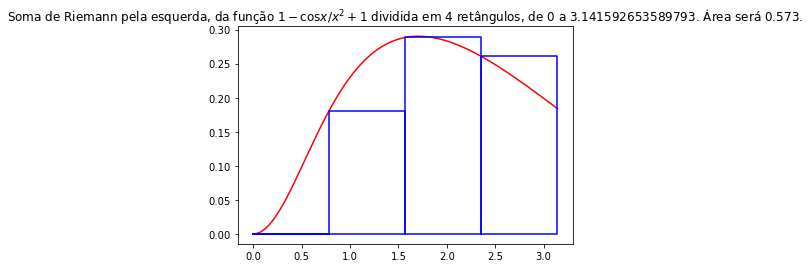

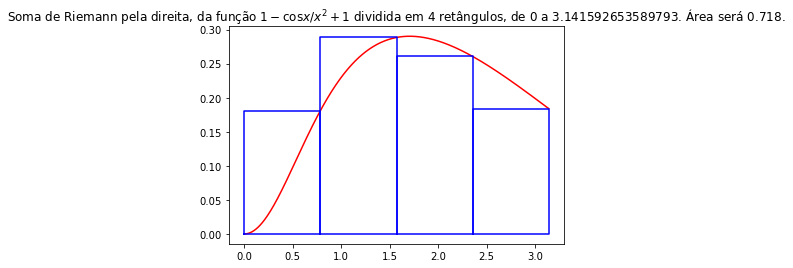

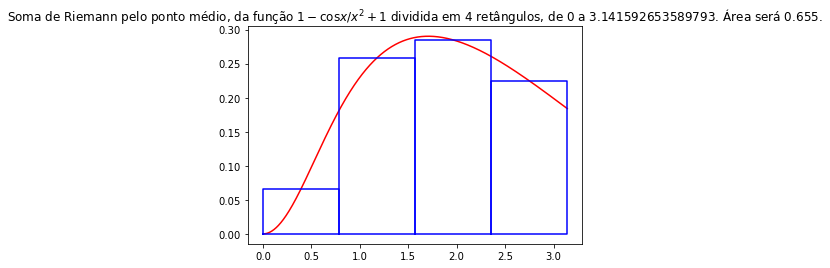

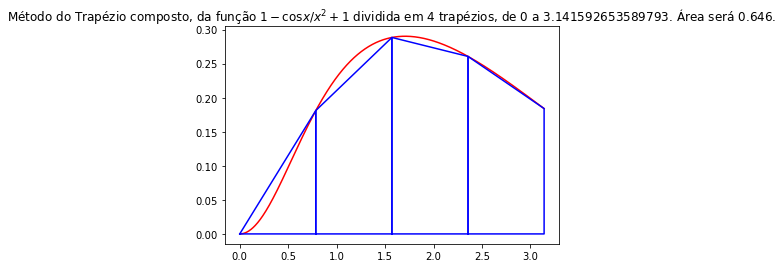

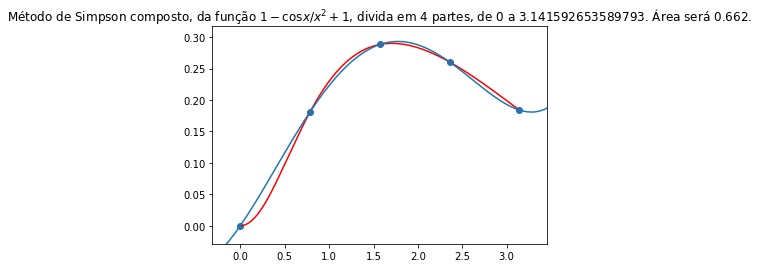

In [469]:
n = 4       
plotRiemannEsquerda(I,a,b,n,nomeI)
plotRiemannDireita(I,a,b,n,nomeI)
plotRiemannPM(I,a,b,n,nomeI)
plotTrapezio(I,a,b,n,nomeI)
plotSimpson(I,a,b,n,nomeI)

### $\int_{0}^{\pi}1+\sin(e^{3x}) dx$
#### Integrado de 0 a $\pi$, o valor esperado é 1.26187

In [497]:
a = 0
b = (math.pi)/3

def I(x):
    return (1+math.sin(math.exp(3*x)))

nomeI = "$\sin(e^{3x})$"

data =[['Intervalos','Passo', 'Riemann PMédio', 'Trapézio', 'Simpson'],
       ['2',"%.2f" %Passo(2),"%.6f" %riemannPontoMedio(I,a,b,2),"%.6f" %metodoTrapezio(I,a,b,2),"%.6f" %metodoSimpson(I,a,b,2)],
       ['4',"%.2f" %Passo(4),"%.6f" %riemannPontoMedio(I,a,b,4),"%.6f" %metodoTrapezio(I,a,b,4),"%.6f" %metodoSimpson(I,a,b,4)],
       ['6',"%.2f" %Passo(6),"%.6f" %riemannPontoMedio(I,a,b,6),"%.6f" %metodoTrapezio(I,a,b,6),"%.6f" %metodoSimpson(I,a,b,6)],
       ['8',"%.2f" %Passo(8),"%.6f" %riemannPontoMedio(I,a,b,8),"%.6f" %metodoTrapezio(I,a,b,8),"%.6f" %metodoSimpson(I,a,b,8)],
       ['10',"%.2f" %Passo(10),"%.6f" %riemannPontoMedio(I,a,b,10),"%.6f" %metodoTrapezio(I,a,b,10),"%.6f" %metodoSimpson(I,a,b,10)],
       ['12',"%.2f" %Passo(12),"%.6f" %riemannPontoMedio(I,a,b,12),"%.6f" %metodoTrapezio(I,a,b,12),"%.6f" %metodoSimpson(I,a,b,12)],
       ['24',"%.2f" %Passo(24),"%.6f" %riemannPontoMedio(I,a,b,24),"%.6f" %metodoTrapezio(I,a,b,24),"%.6f" %metodoSimpson(I,a,b,24)],
       ['48',"%.2f" %Passo(48),"%.6f" %riemannPontoMedio(I,a,b,48),"%.6f" %metodoTrapezio(I,a,b,48),"%.6f" %metodoSimpson(I,a,b,48)],
       ['96',"%.2f" %Passo(96),"%.6f" %riemannPontoMedio(I,a,b,96),"%.6f" %metodoTrapezio(I,a,b,96),"%.6f" %metodoSimpson(I,a,b,96)]]
       
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Intervalos,Passo,Riemann PMédio,Trapézio,Simpson
2,0.52,0.999947,0.507500,0.340011
4,0.26,1.496817,0.753723,0.835798
6,0.17,0.950546,1.417953,1.399940
8,0.13,1.354220,1.125270,1.249119
10,0.10,1.390367,1.113115,1.090812
12,0.09,1.327367,1.184250,1.106349
24,0.04,1.265422,1.255808,1.279661
48,0.02,1.262514,1.260615,1.262217
96,0.01,1.262018,1.261565,1.261881


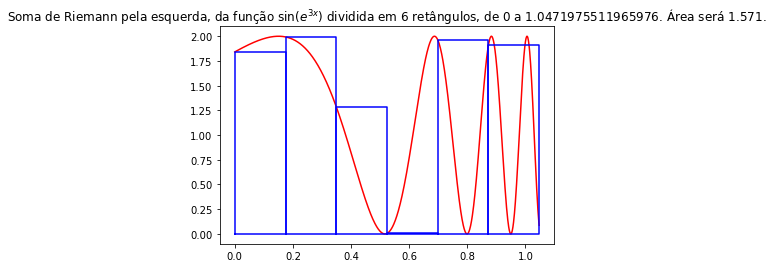

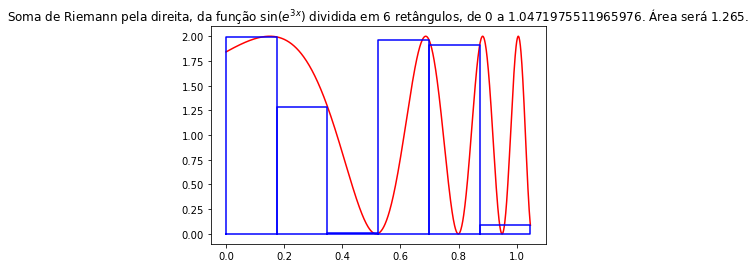

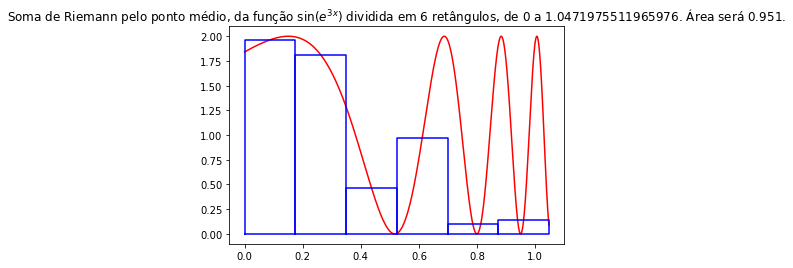

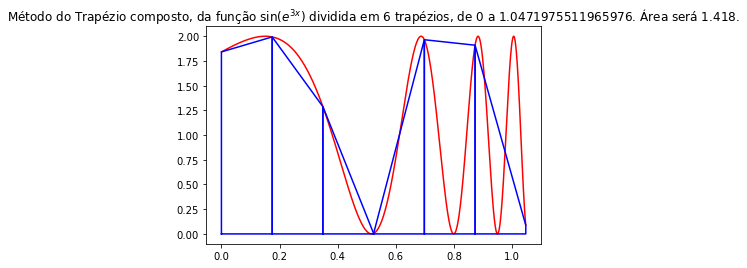

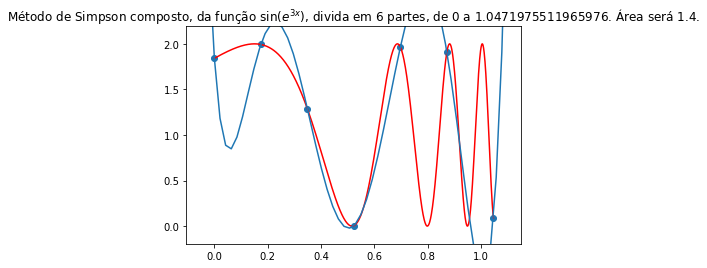

In [502]:
n = 6     
plotRiemannEsquerda(I,a,b,n,nomeI)
plotRiemannDireita(I,a,b,n,nomeI)
plotRiemannPM(I,a,b,n,nomeI)
plotTrapezio(I,a,b,n,nomeI)
plotSimpson(I,a,b,n,nomeI)

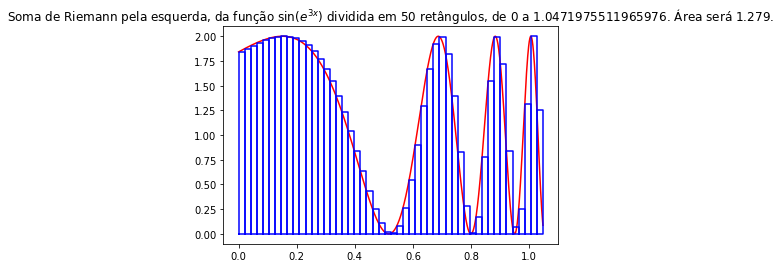

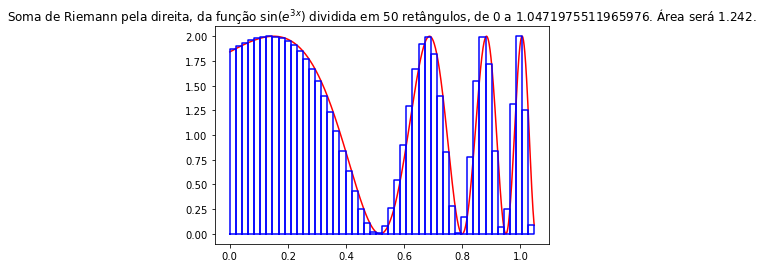

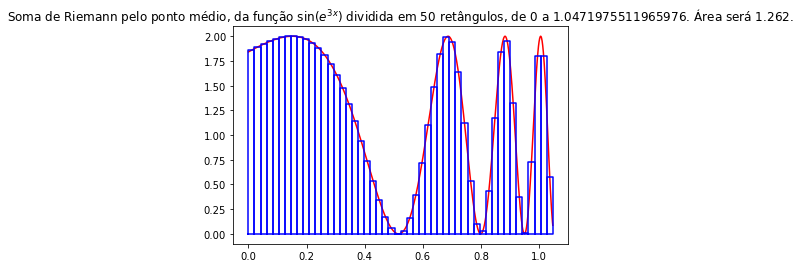

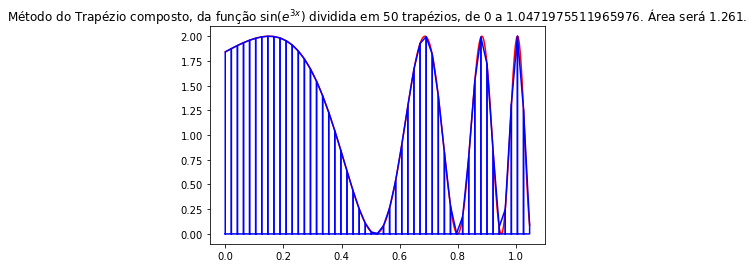

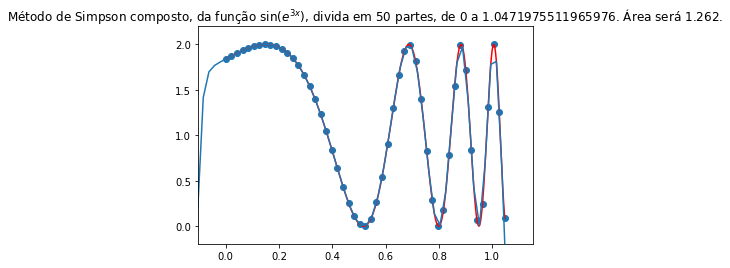

In [503]:
n = 50    
plotRiemannEsquerda(I,a,b,n,nomeI)
plotRiemannDireita(I,a,b,n,nomeI)
plotRiemannPM(I,a,b,n,nomeI)
plotTrapezio(I,a,b,n,nomeI)
plotSimpson(I,a,b,n,nomeI)